In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import gseapy as gp
import seaborn as sns
import matplotlib.pyplot as plt
import decoupler as dc

  

sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(4,4))
plt.rcParams['pdf.fonttype'] = 42
%matplotlib inline

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# import sys
# !{sys.executable} -m pip install ipysankeywidget


# Load adata

In [3]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import gseapy as gp
import seaborn as sns
import matplotlib.pyplot as plt
import decoupler as dc

sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(4,4))
plt.rcParams['pdf.fonttype'] = 42
%matplotlib inline 

In [4]:
sc.settings.figdir = "sfig5"

In [5]:

adata=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated11')
 


In [6]:
adata = adata[adata.obs['test13'].str.startswith(( "F6", "F7", "F8"))] #"F1", "F3",

In [7]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [8]:
adata.raw = ad.AnnData(adata.layers["counts"].copy(), var=adata.var.copy(), obs=adata.obs.copy())


In [9]:
sc.pp.highly_variable_genes(adata,  
                                n_top_genes=6000, 
                                subset=True,
                                #batch_key="DonorID",
                                check_values=False,
                                #layer="normalized"
                               ) #100
adata.shape

(71333, 6000)

In [10]:
net = dc.get_collectri(organism='human', split_complexes=False)
net

,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


In [11]:
dc.run_ulm(
    mat=adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)


adata

3563 features of mat are empty, they will be removed.
Running ulm on mat with 71333 samples and 33038 targets for 763 sources.


100%|██████████| 8/8 [00:44<00:00,  5.54s/it]


AnnData object with n_obs × n_vars = 71333 × 6000
    obs: 'sample_id', 'barcode', 'dataset_id', 'GSE', 'Site_status', 'Patient_status', 'DonorID', 'Location', 'Age', 'Sex', 'n_genes', 'OriginalAnnotation', 'Chemistry', 'lvl3_annotation', 'lvl2_annotation', 'lvl0_annotation', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'leiden_res0.2', 'Site_status_binary', 'atlas_status_reynolds', 'atlas_status', 'Site_status2', 'Patient_status2', 'Sex_original', 'leiden_res1', 'test', 'corefb_names', 'lvl3_annotation_uncert', 'lvl3_annotation_pred', 'leiden_res0.5', 'merged_annotations', 'test3', 'test4', 'test5', 'test6', 'leiden_res0.7', 'test7', 'lvl3_annotation_pred2', 'test8', 'test9', 'test10', 'test11', 'disease_category', 'macfb', 'macfb2', 'test12', 'test13', 'test14', 'test15', 'test

In [12]:
adata.obsm['collectri_ulm_estimate'] = adata.obsm['ulm_estimate'].copy()
adata.obsm['collectri_ulm_pvals'] = adata.obsm['ulm_pvals'].copy()
adata

AnnData object with n_obs × n_vars = 71333 × 6000
    obs: 'sample_id', 'barcode', 'dataset_id', 'GSE', 'Site_status', 'Patient_status', 'DonorID', 'Location', 'Age', 'Sex', 'n_genes', 'OriginalAnnotation', 'Chemistry', 'lvl3_annotation', 'lvl2_annotation', 'lvl0_annotation', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'leiden_res0.2', 'Site_status_binary', 'atlas_status_reynolds', 'atlas_status', 'Site_status2', 'Patient_status2', 'Sex_original', 'leiden_res1', 'test', 'corefb_names', 'lvl3_annotation_uncert', 'lvl3_annotation_pred', 'leiden_res0.5', 'merged_annotations', 'test3', 'test4', 'test5', 'test6', 'leiden_res0.7', 'test7', 'lvl3_annotation_pred2', 'test8', 'test9', 'test10', 'test11', 'disease_category', 'macfb', 'macfb2', 'test12', 'test13', 'test14', 'test15', 'test

In [13]:

acts = dc.get_acts(adata, obsm_key='ulm_estimate')
acts


AnnData object with n_obs × n_vars = 71333 × 763
    obs: 'sample_id', 'barcode', 'dataset_id', 'GSE', 'Site_status', 'Patient_status', 'DonorID', 'Location', 'Age', 'Sex', 'n_genes', 'OriginalAnnotation', 'Chemistry', 'lvl3_annotation', 'lvl2_annotation', 'lvl0_annotation', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'leiden_res0.2', 'Site_status_binary', 'atlas_status_reynolds', 'atlas_status', 'Site_status2', 'Patient_status2', 'Sex_original', 'leiden_res1', 'test', 'corefb_names', 'lvl3_annotation_uncert', 'lvl3_annotation_pred', 'leiden_res0.5', 'merged_annotations', 'test3', 'test4', 'test5', 'test6', 'leiden_res0.7', 'test7', 'lvl3_annotation_pred2', 'test8', 'test9', 'test10', 'test11', 'disease_category', 'macfb', 'macfb2', 'test12', 'test13', 'test14', 'test15', 'test1

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1107: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=palette[label], label=label)


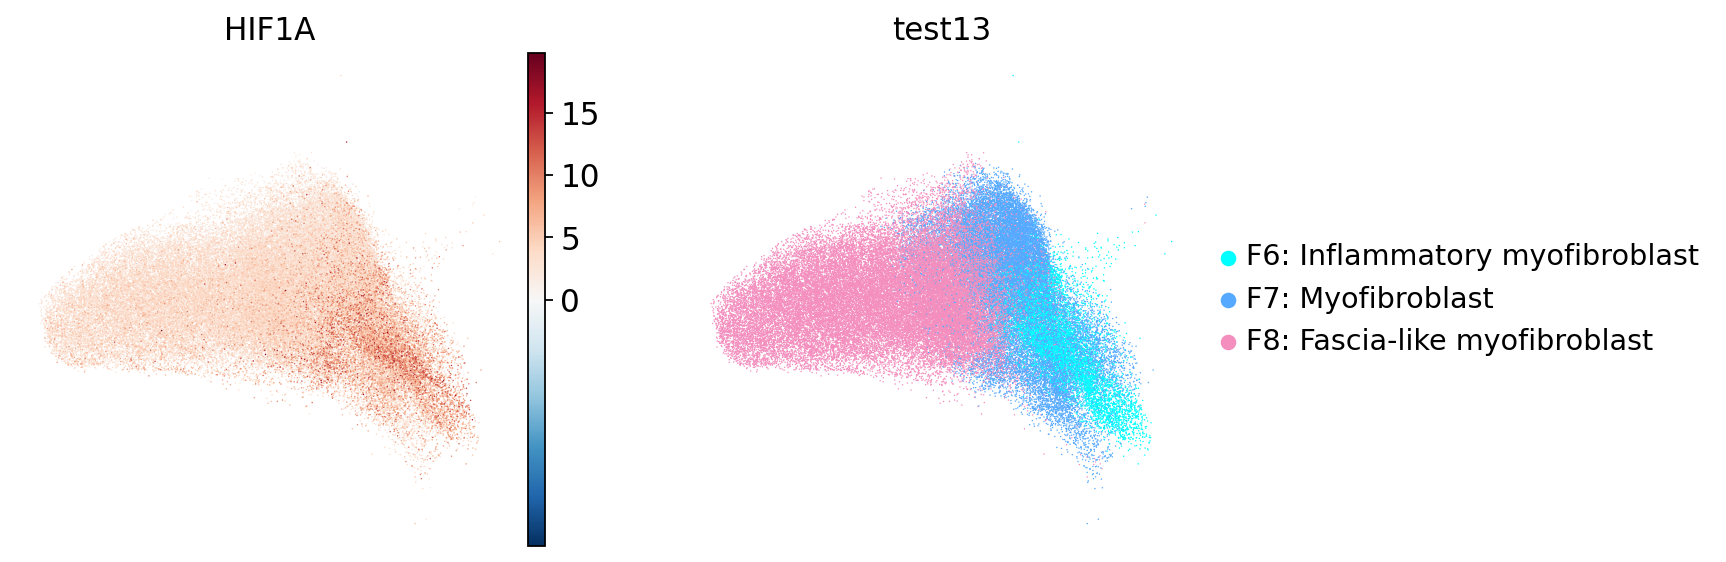

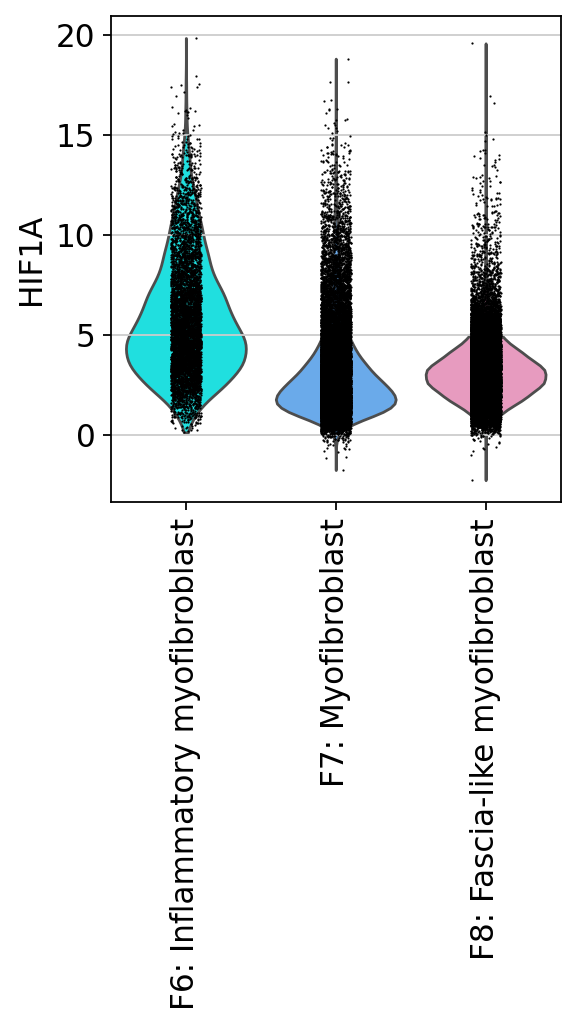

In [14]:
sc.pl.umap(acts, color=['HIF1A', 'test13'], cmap='RdBu_r', vcenter=0)
sc.pl.violin(acts, keys=['HIF1A'], groupby='test13', rotation=90)




/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1107: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=palette[label], label=label)


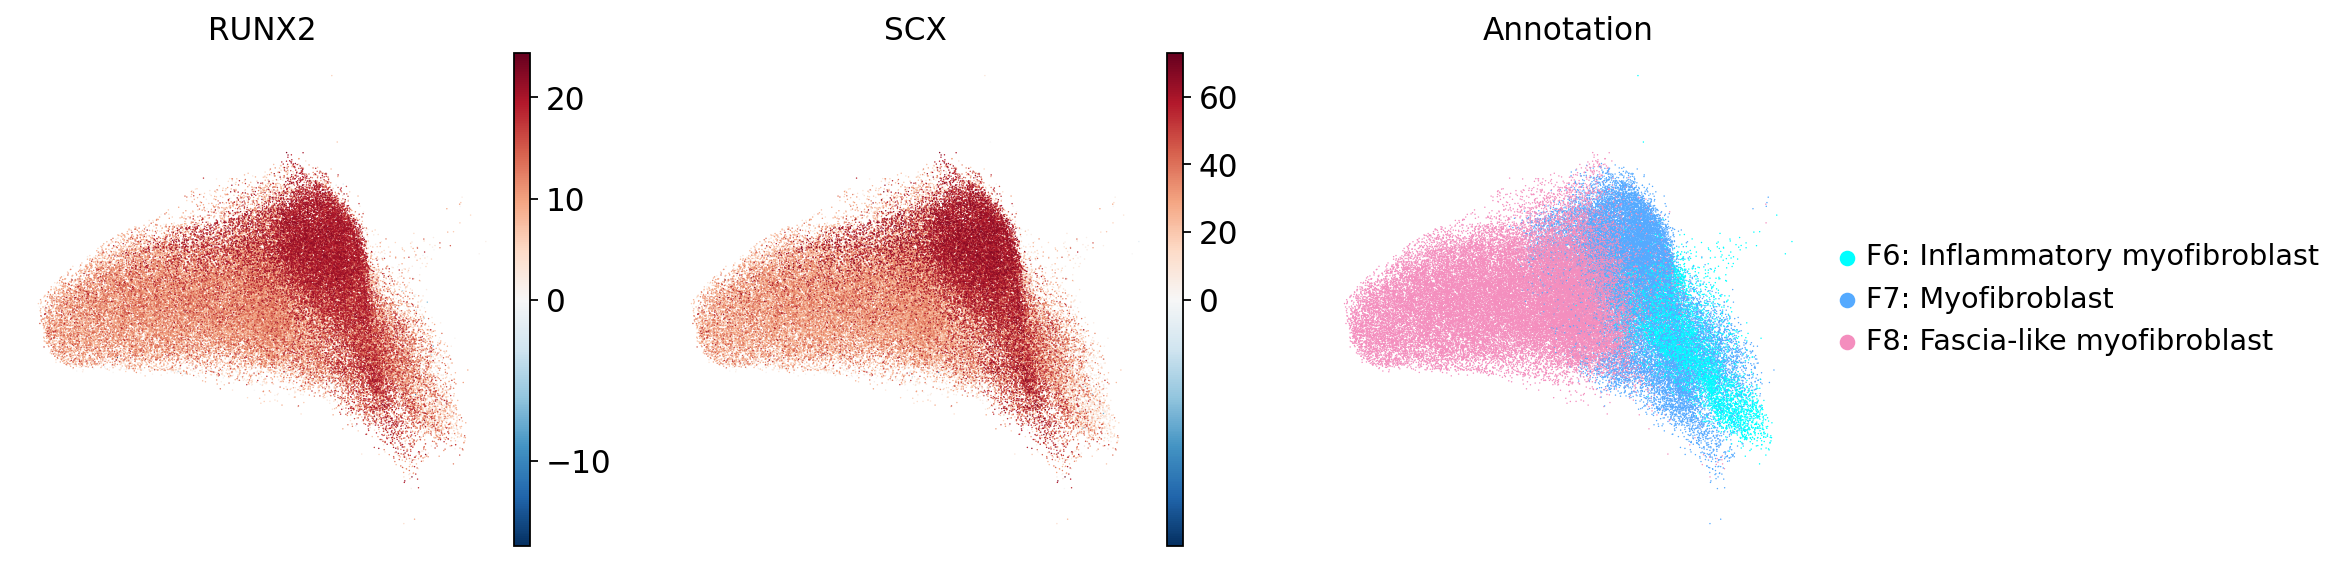

In [15]:
custom_colors = {
    "F1: Superficial": np.array([1.0, 1.0, 0.898, 1.0]),
   # "F1: Regenerative": np.array([0.996, 0.809, 0.396, 1.0]),
    #"F2: Universal": np.array([0.814, 0.884, 0.950, 1.0]),
    #"F2/3: Stroma_PPARG+": np.array([0.473, 0.712, 0.851, 1.0]),
    "F3: FRC-like": np.array([0.997, 0.896, 0.849, 1.0]),
  "F6: Inflammatory myofibroblast": np.array([0.0, 1.0, 1.0, 1.0]),
    "F6: Myofibroblast": np.array([0.333, 0.667, 1.0, 1.0]),
        "F7: Myofibroblast": np.array([0.333, 0.667, 1.0, 1.0]),

    "F7: Fascia-like myofibroblast": np.array([0.957, 0.557, 0.745, 1.0]),
    "F8: Fascia-like myofibroblast": np.array([0.957, 0.557, 0.745, 1.0]),

}

acts.obs['Annotation']=acts.obs['test13']
acts.obs['Annotation'] = acts.obs['Annotation'].astype('category')   

# Match colors to these categories
acts.uns['Annotation_colors'] = [custom_colors.get(cat, '#808080') for cat in acts.obs['Annotation'].cat.categories]
sc.pl.umap(acts, color=['RUNX2', "SCX", 'Annotation'], cmap='RdBu_r', vcenter=0,
          save="sig5f.pdf")




In [16]:
# sc.pl.violin(acts, keys=['RUNX2'], groupby='test13', rotation=90)


In [17]:
df = dc.rank_sources_groups(acts, groupby='test13', reference='rest', method='t-test_overestim_var')
df

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,F6: Inflammatory myofibroblast,rest,RELA,66.429100,4.621173,0.0,0.0
1,F6: Inflammatory myofibroblast,rest,HIVEP2,64.529530,3.074440,0.0,0.0
2,F6: Inflammatory myofibroblast,rest,STAT3,63.047144,2.750034,0.0,0.0
3,F6: Inflammatory myofibroblast,rest,HIF1A,62.510586,2.719584,0.0,0.0
4,F6: Inflammatory myofibroblast,rest,TEAD1,62.507594,1.160740,0.0,0.0
...,...,...,...,...,...,...,...
2284,F8: Fascia-like myofibroblast,rest,SMAD6,-129.210861,-4.659697,0.0,0.0
2285,F8: Fascia-like myofibroblast,rest,ZNF148,-133.728830,-4.851256,0.0,0.0
2286,F8: Fascia-like myofibroblast,rest,NEUROD1,-134.015051,-2.867299,0.0,0.0
2287,F8: Fascia-like myofibroblast,rest,FOXN1,-135.787456,-3.153731,0.0,0.0


In [18]:
n_markers = 5
source_markers = df.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers

{'F6: Inflammatory myofibroblast': ['RELA',
  'HIVEP2',
  'STAT3',
  'HIF1A',
  'TEAD1'],
 'F7: Myofibroblast': ['SMAD6', 'ZNF148', 'HMGA1', 'NEUROD1', 'FOXN1'],
 'F8: Fascia-like myofibroblast': ['ID1', 'ID2', 'CDX1', 'HAND2', 'EBF1']}

In [19]:
ORDER=[#'F1: Superficial',
 #'F2: Universal',
  #      'F2/3: Stroma_PPARG+',
# 'F3: FRC-like',
 ##'F4: DS_DPEP1+',
 #'F4: TNN+COCH+',
 #'F4: DP_HHIP+', 'F5: RAMP1+',
 #'F5: NGFR+',

 'F6: Inflammatory myofibroblast',
 'F6: Myofibroblast',

 'F7: Fascia-like myofibroblast',
 #'F_Fascia',
      ]
# sc.pl.matrixplot(acts, source_markers, 'test13', dendrogram=True, standard_scale='var',
#                  colorbar_title='Z-scaled scores', cmap='Reds',categories_order=ORDER)
# sc.pl.matrixplot(acts, source_markers, 'test13', dendrogram=True,#standard_scale='var',
#                  colorbar_title='scores', cmap='Reds',categories_order=ORDER,
#                 vmax=15)

import pandas as pd

# Explicitly set category order
acts.obs['test13'] = pd.Categorical(acts.obs['test13'], categories=ORDER, ordered=True)

# Plot without dendrogram (ensures category order is used)
sc.pl.matrixplot(
    acts, source_markers, 'test13', 
    dendrogram=False,  # Disable automatic reordering
    standard_scale='var', colorbar_title='Z-scaled scores', 
    cmap='Reds', categories_order=ORDER
)

sc.pl.matrixplot(
    acts, source_markers, 'test13', 
    dendrogram=False,  # Disable automatic reordering
    colorbar_title='scores', cmap='Reds', 
    categories_order=ORDER, vmax=8,vmin=0,
        save="sig5f_part2.pdf")
)


SyntaxError: unmatched ')' (2293024259.py, line 41)

In [ ]:
# sc.pl.umap(acts, color=['RUNX2', "SCX", "test13"], cmap='RdBu_r', vcenter=0)




In [ ]:
# list(adata.obs.test13.unique())

In [ ]:
# source_markers={'F1: Superficial': ['HAND1', 'USF2', 'SREBF1', 'PITX2', 'ZBTB17'],

#  'F2: Universal': ['ZFPM2', 'SPIB', 'KLF5', 'SKIL', 'USF1'],
#                  'F2/3: Stroma_PPARG+': ['NR1H4', 'MSX2', 'RFX5', 'SMAD7', 'CIITA'],
#  'F3: FRC-like': ['NFKB1', 'RELB', 'RELA', 'NR1H3', 'IRF1'],

#  'F4: DS_DPEP1+': ['E2F4', 'MYC', 'TBX20', 'NPM1', 'MLX'],
#  'F4: TNN+COCH+': ['TCF15', 'MYF5', 'HLX', 'ZNF202', 'NR5A2'],
#                  'F4: DP_HHIP+': ['FOXD1', 'LHX3', 'FOXH1', 'GSC', 'IRX1'],

#  'F5: RAMP1+': ['HIPK2', 'APEX1', 'KLF8', 'PAWR', 'TP73'],
#                  'F5: NGFR+': ['APEX1', 'TP73', 'TP63', 'RFX5', 'CIITA'],
#  'F6: Inflammatory myofibroblast': ['LMX1B', 'KAT7', 'FOSB', 'HOXA11', 'MYRF'],
#  'F6: Myofibroblast': ['DLX5', 'SP7', 'SCX', 'ZBTB7B', 'NFATC4'],
#  'F7: Fascia-like myofibroblast': ['HAND2', 'CDX1', 'ID1', 'TWIST2', 'EBF1'],
#  'F_Fascia': ['SON', 'SOX6', 'SOX5', 'SOX17', 'SOX9']}

In [ ]:
STOP

In [ ]:
source_markers

In [ ]:
fetal_source_markers = {'Dermal papilla': ['SMAD7', 'YBX1', 'FOXC2', 'FOXH1', 'POU3F1'],
 'Dermal condensate': ['MYBL2', 'POU4F2', 'FOSL2', 'SOX4', 'NRL'],
 'Pre-dermal condensate': ['HAND1', 'RUNX3', 'CUX1', 'ZEB2', 'IRF6'],
 'HOXC5+ early fibroblast': ['PKNOX1', 'IRF6', 'NR2C1', 'ID2', 'IRF3'],
 'FRZB+ early fibroblast': ['LRRFIP1', 'NR1H2', 'HOXA5', 'ZHX2', 'NR1D1'],
 'PEAR1+ fibroblast': ['AEBP1', 'SSRP1', 'NR1H4', 'MBD1', 'NR1H3'],
 'COLEC11+C7+ fibroblast': ['APEX1', 'JUND', 'DDIT3', 'REL', 'NFKB'],
 'CCL19+ fibroblasts (mLTO)': ['RELB', 'NFKB2', 'IRF7', 'NR1H4', 'CIITA'],
 'WNT2+ fibroblast': ['CDX1', 'BHLHA15', 'EBF1', 'FOSL1', 'HAND2'],
 'WNT2+ Adipocytes': ['SPI1', 'TBX21', 'ELF1', 'IRF5', 'CEBPA'],
 'Myofibroblasts': ['PITX3', 'FOXA2', 'CRX', 'ZKSCAN7', 'PLAGL1']}

fetal_source_markers = {
    key: [gene for gene in genes if gene in acts.var_names] 
    for key, genes in fetal_source_markers.items()
}

sc.pl.matrixplot(
    acts, fetal_source_markers, 'test13', 
    dendrogram=False,  # Disable automatic reordering
    standard_scale='var', colorbar_title='Z-scaled scores', 
    cmap='Reds', categories_order=ORDER
)

sc.pl.matrixplot(
    acts, fetal_source_markers, 'test13', 
    dendrogram=False,  # Disable automatic reordering
    colorbar_title='scores', cmap='Reds', 
    categories_order=ORDER, vmax=10,vmin=-0,
)

In [ ]:
acts.obs

In [ ]:
import pandas as pd

# Ensure correct category order
acts.obs['test13'] = pd.Categorical(acts.obs['test13'], categories=ORDER, ordered=True)

# Now plot
sc.pl.matrixplot(
    acts, source_markers, 'test13', dendrogram=True, 
    standard_scale='var', colorbar_title='Z-scaled scores', 
    cmap='RdBu_r', categories_order=ORDER
)

sc.pl.matrixplot(
    acts, source_markers, 'test13', dendrogram=True,
    colorbar_title='scores', cmap='RdBu_r', 
    categories_order=ORDER
)

In [ ]:
ALL_GENES={'F1: Superficial': ['PITX2', 'RUNX2', 'SMAD3', 'POU2F2', 'HOXA5'],
 'F2/3: Stroma_PPARG+': ['APEX1', 'CEBPA', 'RFX5', 'CIITA', 'FLI1'],
 'F2: Universal': ['ZFPM2', 'SPIB', 'KLF5', 'SKIL', 'FOSL1'],
 'F3: FRC-like': ['NR1H3', 'NFKB1', 'NFKB', 'RELB', 'RELA'],
 'F4: DP_HHIP+': ['GSC', 'FOXH1', 'GRHL3', 'NKX3-2', 'PAX2'],
 'F4: DS_DPEP1+': ['NFATC1', 'FOXH1', 'TCF7', 'NR4A2', 'PAX8'],
 'F4: TNN+COCH+': ['IRF8', 'ZNF382', 'MYF5', 'RUNX3', 'MYOD1'],
 'F5: NGFR+': ['TP63', 'APEX1', 'CTNNB1', 'TP73', 'CIITA'],
 'F5: RAMP1+': ['PDX1', 'BARX2', 'TP73', 'TBX2', 'CIITA'],
 'F1: Superficial_disease': ['HAND1', 'USF2', 'SREBF1', 'PITX2', 'ZBTB17'],
 'F3: FRC-like_dosease': ['NFKB1', 'RELB', 'RELA', 'NR1H3', 'IRF1'],
 'F6: Inflammatory myofibroblast': ['LMX1B', 'KAT7', 'FOSB', 'HOXA11', 'MYRF'],
 'F6: Myofibroblast': ['DLX5', 'SP7', 'SCX', 'ZBTB7B', 'NFATC4'],
 'F7: Fascia-like myofibroblast': ['HAND2', 'CDX1', 'ID1', 'TWIST2', 'EBF1'],
 'F_Fascia': ['SON', 'SOX6', 'SOX5', 'SOX17', 'SOX9']}
sc.pl.matrixplot(acts, ALL_GENES, 'test13', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r')
sc.pl.matrixplot(acts, ALL_GENES, 'test13', dendrogram=True,#standard_scale='var',
                 colorbar_title='scores', cmap='RdBu_r')

In [ ]:
sc.pl.violin(acts, keys=['RUNX2'], groupby='test13', rotation=90)


In [ ]:
dc.plot_network(
    net=net,
    n_sources=['HIF1A', 'RUNX2'],
    n_targets=5,
    node_size=1,
    s_cmap='white',
    t_cmap='white',
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    figsize=(15, 15)
)

In [ ]:
FETAL_TFS= {'CCL19+ fibroblasts (mLTO)': ['RELB', 'NFKB2', 'NR1H4', 'IRF7', 'TFAP2B'],
 'COLEC11+C7+ fibroblast': ['APEX1', 'NFKB', 'DDIT3', 'REL', 'AHR'],
 'Dermal condensate': ['MYBL2', 'POU4F2', 'ZNF699', 'FOSL2', 'MYOD1'],
 'Dermal papilla': ['YBX1', 'SMAD7', 'FOXC2', 'POU3F1', 'HOXA13'],
 'FRZB+ early fibroblast': ['NR5A1', 'SOX10', 'BCL11A', 'FOXC1', 'LITAF'],
 'HOXC5+ early fibroblast': ['NR2C1', 'IRF6', 'ZBTB16', 'IRF3', 'TCF7L2'],
 'Myofibroblasts': ['FOXA2', 'PITX3', 'FOXJ1', 'KLF2', 'MSX1'],
 'PEAR1+ fibroblast': ['NR1H2', 'SSRP1', 'NR1H3', 'NR1H4', 'MBD1'],
 'Pre-dermal condensate': ['CUX1', 'PITX2', 'SRSF2', 'RUNX2', 'ZEB2'],
 'WNT2+ Adipocytes': ['SPI1', 'TBX21', 'ELF1', 'KAT6A', 'CEBPA'],
 'WNT2+ fibroblast': ['CDX1', 'BHLHA15', 'EBF1', 'HAND2', 'ZNF148']}

sc.pl.matrixplot(acts, FETAL_TFS, 'test13', dendrogram=True,#standard_scale='var',
                 colorbar_title='scores', cmap='RdBu_r')